# Approach 1

In [78]:
import datetime
timestamp = datetime.datetime.fromtimestamp(1500000000)
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

def generate_timestamp(seed: int) -> int:
    # Set the seed for the random number generator
    random.seed(seed)

    # Generate a random timestamp using a normal distribution with mean 100 and standard deviation 15
    timestamp = int(np.random.normal(100, 15))

    return timestamp


2017-07-14 03:40:00


In [40]:

import random
import numpy as np
timestamp = generate_timestamp(123)
print(timestamp)

86


In [41]:
from datetime import timedelta
import random
import numpy as np

sec = 43200
print('Time in Seconds:', sec)

td = timedelta(seconds=sec)
print('Time in hh:mm:ss:', td)

# Use the below code if you want it in a string
print(str(timedelta(seconds=sec)))

def generate_timestamp(seed: int) -> int:
    # Set the seed for the random number generator
    random.seed(seed)

    # Generate a random timestamp using a normal distribution with mean 100 and standard deviation 15
    timestamp = int(np.random.normal(100, 15))

    return timestamp


Time in Seconds: 43200
Time in hh:mm:ss: 12:00:00
12:00:00


# Overview - approaches for probability distribution

# Approach 2 - Specified probability approach

Given certain input hours converted into seconds, and probabilities, select input hour.
reference:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html

In [71]:
# e.g # 9 am = 32400 # noon = 43200 # 24hrs = 86400
# times = [6,8,10,12]
# t_probs = [0.1, 0.2, 0.4, 0.3]

times = [6,8,10,12,14,16,18,20,22]
t_probs = [0.1, 0.2, 0.05, 0.05, 0.05, 0.2, 0.15, 0.1, 0.1]

In [70]:
a = sum(t_probs)
print(a)

1.0


In [48]:
def _convert_hr_to_sec(input: int) -> int:
    """function converts hour to sec.
    Args:
    input: an integer.

    Returns:
    out: a scaled version of input integer.
    """
    
    out = input * 3600
    return out


In [51]:
output_list = [_convert_hr_to_sec(i) for i in times]
print(output_list)

[21600, 28800, 36000, 43200]


In [45]:
import scipy.stats

def generate_probability_distribution(values, probabilities):
  """Generates a probability distribution using scipy.stats.rv_discrete.

  Args:
    values: A list of values for the discrete random variable.
    probabilities: A list of probabilities for the corresponding values.

  Returns:
    A scipy.stats.rv_discrete object representing the probability distribution.
  """
  return scipy.stats.rv_discrete(values=(values, probabilities))


In [77]:
t_distro = generate_probability_distribution(times, t_probs)

# Generate a random sample from the distribution
t_sample = t_distro.rvs(size=10)
print(t_sample)

[16 20 20 12  8 18  8 18 18 12]


Rough work - Please Ignore

# Approach 3 - moments - mean,sd

In [ ]:
# import uniform distribution
from scipy.stats import uniform
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


/var/folders/kg/f35djr1563d18wz4pw_nkv2m0000gn/T/ipykernel_88855/670887352.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_normal,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

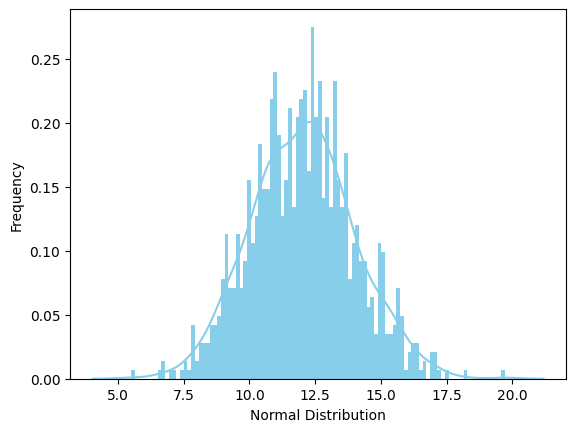

In [15]:
# normal distribution
from scipy.stats import norm
import seaborn as sns
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=1000,loc=12,scale=2, random_state = 42)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

# loc=mean, scale=sd, size=no_of_samples

In [11]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=1000, random_state = 42)
# ax = sns.distplot(data_poisson,
#                   bins=30,
#                   kde=False,
#                   color='skyblue',
#                   hist_kws={"linewidth": 15,'alpha':1})
# ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

# Other

In [46]:
# Generate a probability distribution for the discrete random variable X,
# where X can take on the values 0, 1, or 2 with probabilities 0.1, 0.2, and 0.7, respectively.
# values = [0, 1, 2]
# probabilities = [0.1, 0.2, 0.7]
# distribution = generate_probability_distribution(values, probabilities)

# Generate a random sample from the distribution
# sample = distribution.rvs(size=10)
# print(sample)
